## Purpose
The purpose of this notebook is to validate that all the scripts in this project work as expected. In other words: If we generate a dummy data set where 1. aerobic exercise are characterized by a high heart rate and **high num. steps** and 2. strength exercises are characterized by a high heart rate and **low num. steps**, then we expect that our methods will be able distinguish between aerobic and strength activity. I.e. the final classifier should have a perfect score on the dummy test set.

In [14]:
import pandas as pd
import numpy as np
import pickle
import json
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt

from preprocessing import helperfuns

## Generate Dummy HR and Steps Data

In [2]:
HR_SAMPLING_RATE = "9S"
STEPS_SAMPLING_RATE = "1min"

In [3]:
hr_other_num = int(pd.Timedelta("60min") / pd.Timedelta(HR_SAMPLING_RATE))
steps_other_num = int(pd.Timedelta("60min") / pd.Timedelta(STEPS_SAMPLING_RATE))
hr_arm_num = int(pd.Timedelta("70min") / pd.Timedelta(HR_SAMPLING_RATE))
steps_arm_num = int(pd.Timedelta("70min") / pd.Timedelta(STEPS_SAMPLING_RATE))

In [4]:
dummie_hr = dict()
dummie_steps = dict()

In [5]:
# aerobic dummy data
for i in range(3):
    # HR
    dummy_other_hr = pd.DataFrame(np.random.rand(hr_other_num)*10 + 60, columns=["Value"], index=pd.date_range("12:00", periods=hr_other_num, freq=HR_SAMPLING_RATE))
    dummy_aerobic_hr = pd.DataFrame(np.random.rand(hr_arm_num)*10 + 90, columns=["Value"], index=pd.date_range("13:00", periods=hr_arm_num, freq=HR_SAMPLING_RATE))
    dummie_hr[f"dummy{i}"] = pd.concat([dummy_other_hr, dummy_aerobic_hr])

    # steps
    dummy_other_steps = pd.DataFrame(np.random.rand(steps_other_num)*10 + 0, columns=["Steps"], index=pd.date_range("12:00", periods=steps_other_num, freq=STEPS_SAMPLING_RATE))
    dummy_aerobic_steps = pd.DataFrame(np.random.rand(steps_arm_num)*10 + 50, columns=["Steps"], index=pd.date_range("13:00", periods=steps_arm_num, freq=STEPS_SAMPLING_RATE))
    dummie_steps[f"dummy{i}"] = pd.concat([dummy_other_steps, dummy_aerobic_steps])

In [6]:
# strength dummy data
for i in range(3, 6):
    # HR (same baseline change as aerobic)
    dummy_other_hr = pd.DataFrame(np.random.rand(hr_other_num)*10 + 60, columns=["Value"], index=pd.date_range("12:00", periods=hr_other_num, freq=HR_SAMPLING_RATE))
    dummy_aerobic_hr = pd.DataFrame(np.random.rand(hr_arm_num)*10 + 90, columns=["Value"], index=pd.date_range("13:00", periods=hr_arm_num, freq=HR_SAMPLING_RATE))
    dummie_hr[f"dummy{i}"] = pd.concat([dummy_other_hr, dummy_aerobic_hr])

    # steps (no baseline change)
    dummy_other_steps = pd.DataFrame(np.random.rand(steps_other_num)*10 + 0, columns=["Steps"], index=pd.date_range("12:00", periods=steps_other_num, freq=STEPS_SAMPLING_RATE))
    dummy_aerobic_steps = pd.DataFrame(np.random.rand(steps_arm_num)*10 + 0, columns=["Steps"], index=pd.date_range("13:00", periods=steps_arm_num, freq=STEPS_SAMPLING_RATE))
    dummie_steps[f"dummy{i}"] = pd.concat([dummy_other_steps, dummy_aerobic_steps])

In [7]:
hr_df = pd.concat(dummie_hr)
hr_df.index.rename(["Id", "Time"], inplace=True)

In [9]:
ckle.dump(hr_df, open("preprocessing/clean_data/dummy_hr_seconds_df.pickle", "wb"))

In [10]:
steps_df = pd.concat(dummie_steps)
steps_df.index.rename(["Id", "ActivityMinute"], inplace=True)

In [12]:
pickle.dump(steps_df, open("preprocessing/clean_data/dummy_steps_minutes_df.pickle", "wb"))

## Load Raw Dummy Data

In [15]:
cleaned_steps_path = 'preprocessing/clean_data/dummy_steps_minutes_df.pickle'
cleaned_hr_path = 'preprocessing/clean_data/dummy_hr_seconds_df.pickle'

steps_df, hr_df = helperfuns.load_data(
    steps_path=cleaned_steps_path,
    hr_path=cleaned_hr_path,
    validate_ids=False,
    sample_num=None,
    subset_ids=None,
    sort=False,
)

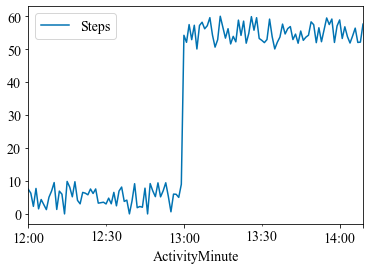

In [17]:
steps_df.loc["dummy0"].plot()

## Generate Dummy Labels

In [20]:
real_labels = pickle.load(open("preprocessing/clean_data/labels_df.pickle", "rb"))

In [21]:
real_labels

Arm
Id         Time                         
32113-0004 2017-07-17 15:41:21  strength
           2017-07-18 16:00:51  strength
           2017-07-19 15:55:02  strength
           2017-07-25 09:11:24  strength
           2017-07-27 10:01:30  strength
...                                  ...
32113-0347 2019-12-05 15:03:19   aerobic
           2019-12-05 15:04:21   aerobic
           2019-12-06 13:30:35   aerobic
           2019-12-11 11:54:40   aerobic
           2019-12-09 12:41:56   aerobic

[12810 rows x 1 columns]

In [26]:
dummy_labels = dict()

In [33]:
# aerobic
for i in range(3):
    dummy_labels[f"dummy{i}"] = pd.DataFrame(["aerobic"], columns=["Arm"], index=[pd.to_datetime("2020-09-07 13:00")])

# strength
for i in range(3, 6):
     dummy_labels[f"dummy{i}"] = pd.DataFrame(["strength"], columns=["Arm"], index=[pd.to_datetime("2020-09-07 13:00")])

In [38]:
labels_df = pd.concat(dummy_labels)
labels_df.index.rename(["Id", "Time"], inplace=True)

In [39]:
labels_df

,,Arm
Id,Time,
dummy0,2020-09-07 13:00:00,aerobic
dummy1,2020-09-07 13:00:00,aerobic
dummy2,2020-09-07 13:00:00,aerobic
dummy3,2020-09-07 13:00:00,strength
dummy4,2020-09-07 13:00:00,strength
dummy5,2020-09-07 13:00:00,strength


In [40]:
pickle.dump(labels_df, open("preprocessing/clean_data/dummy_labels_df.pickle", "wb")) 

## Generate Dummy Split

In [14]:
split_dict = { 
    "train": ["dummy0", "dummy2", "dummy4"],
    "test": ["dummy1", "dummy3", "dummy5"],
    }

In [16]:
json.dump(split_dict, open("dummy_split.json", "w"))

## Use the Dummy Data, Labels and Splits for Feature Engineering and Training

### Example Commands and Outputs for 10min Window

```
cd preprocessing
python spectrogram_features.py --cleaned_steps_path clean_data/dummy_steps_minutes_df.pickle --cleaned_hr_path clean_data/dummy_hr_seconds_df.pickle --window_size_in_minutes 10 --no-overlap --save_dir features/dummy/
```

> Validating that the steps and HR data have the same set of participant IDs.
Sorting steps and HR data by participant ID and then timestamp.
Removing all step data on a day if the total number of steps is zero on that day.
Creating steps and HR spectrogram features for each participant.
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 56.64it/s]
Saved steps spectrogram features to features/dummy/steps_spectrogram_features_df_window=10min_overlap=False.pickle.
Saved HR spectrogram features to features/dummy/hr_spectrogram_features_df_window=10min_overlap=False.pickle.

`python rolling_features.py --cleaned_steps_path clean_data/dummy_steps_minutes_df.pickle --cleaned_hr_path clean_data/dummy_hr_seconds_df.pickle --window_size 10min --save_dir features/dummy/`

> Validating that the steps and HR data have the same set of participant IDs.
Sorting steps and HR data by participant ID and then timestamp.
Removing all step data on a day if the total number of steps is zero on that day.
Creating steps and HR rolling features.
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 32.58it/s]
Saved steps rolling features to features/dummy/steps_rolling_features_df_window=10min.pickle.
Saved HR rolling features to features/dummy/hr_rolling_features_df_window=10min.pickle.

In `merging.py`, make sure to change the following: `labels_path="clean_data/labels_df.pickle"` to `labels_path="clean_data/dummy_labels_df.pickle"`

`python merging.py --tolerance 1min features/dummy/steps_rolling_features_df_window=10min.pickle features/dummy/hr_rolling_features_df_window=10min.pickle features/dummy/merged/all_rolling_window=10min.pickle`

> The first feature file contains 780 rows.
After merging (time-based left joins) with labels, the resulting dataframe contains 726 (93.08% of the starting number of rows).
After merging (time-based left joins) the features, the resulting dataframe contains 720 (92.31% of the starting number of rows).
Saved the merged features and labels to features/dummy/merged/all_rolling_window=10min.pickle.

`python merging.py --tolerance 10min features/dummy/merged/all_rolling_window=10min.pickle features/dummy/steps_spectrogram_features_df_window=10min_overlap=False.pickle features/dummy/hr_spectrogram_features_df_window=10min_overlap=False.pickle features/dummy/merged/all_rolling_spectrogram_window=10min.pickle`

> The first feature file contains 720 rows.
After merging (time-based left joins) with labels, the resulting dataframe contains 720 (100.0% of the starting number of rows).
After merging (time-based left joins) the features, the resulting dataframe contains 720 (100.0% of the starting number of rows).
Saved the merged features and labels to features/dummy/merged/all_rolling_spectrogram_window=10min.pickle.

`cd ..`

In `training.py`, make sure to change the following: `NUM_SPLITS = 10` to `NUM_SPLITS=3`, `with open("train_test_participants.json") as f: split_dict = json.load(f)` to `with open("dummy_split.json") as f: split_dict = json.load(f)`

`python training.py --merged_features_path preprocessing/features/dummy/merged/all_rolling_spectrogram_window=10min.pickle --save_path results/dummy_gridsearch_all_rolling_spectrogram_window=10min.pickle`

> The input (binary=False) has 720 rows.
Training on the following 3 participants: ['dummy0', 'dummy4', 'dummy2']
Fitting 3 folds for each of 12 candidates, totalling 36 fits

> ...

> Saved the grid search results to results/dummy_gridsearch_all_rolling_spectrogram_window=10min.pickle.

## Dummy Evaluation

In [2]:
WINDOW = "60min"
BINARY = False

grid_search = pickle.load(open(f"results/dummy_gridsearch_all_rolling_spectrogram_window={WINDOW}.pickle", "rb"))
print(grid_search.best_score_)
print(grid_search.param_grid)
print(grid_search.best_params_)

0.7722206785835571
{'max_features': ['sqrt', 0.5, None], 'min_samples_leaf': [1, 0.01], 'max_samples': [0.5, None]}
{'max_features': 'sqrt', 'max_samples': 0.5, 'min_samples_leaf': 0.01}


In [3]:
grid_search.cv_results_

{'mean_fit_time': array([2.25252597, 2.34053898, 2.31805166, 2.33407497, 2.27437703,
        2.42089335, 2.35436527, 2.58863036, 2.50455268, 2.51662636,
        2.99605529, 2.33586931]),
 'std_fit_time': array([0.01035163, 0.05255304, 0.01144491, 0.02533366, 0.04771621,
        0.03905825, 0.0497632 , 0.20208776, 0.02707939, 0.05111808,
        0.6348289 , 0.0219835 ]),
 'mean_score_time': array([0.24502349, 0.18647401, 0.21082862, 0.18985073, 0.18886169,
        0.18844128, 0.21062795, 0.18755364, 0.21121415, 0.20625361,
        0.17797589, 0.16135502]),
 'std_score_time': array([0.04361899, 0.00488219, 0.01514595, 0.00136445, 0.0100018 ,
        0.01118625, 0.02788604, 0.00817319, 0.00844764, 0.00501577,
        0.01017602, 0.00242133]),
 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt', 'sqrt', 0.5, 0.5, 0.5, 0.5,
                    None, None, None, None],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, F

In [4]:
with open(f"preprocessing/features/dummy/merged/all_rolling_spectrogram_window={WINDOW}.pickle", "rb") as f:
    X = pickle.load(f)

# drop the raw data, i.e. keep only the features
X.drop(["Steps", "Value"], axis=1, inplace=True, errors="ignore")

# separate features X vs labels y
y = X["Arm"]
X.drop("Arm", axis=1, inplace=True)

In [5]:
importance_df = pd.DataFrame({"Feature": X.columns, "Gini Importance": grid_search.best_estimator_.feature_importances_})
importance_df.sort_values("Gini Importance", ascending=False, inplace=True)
importance_df

,Feature,Gini Importance
15,Steps_spectrogram_0.00194Hz,0.116177
10,HR_max,0.110285
7,HR_mean,0.109829
13,HR_quant75,0.092172
22,Value_spectrogram_0.03Hz,0.072592
6,Steps_quant75,0.060416
14,Steps_spectrogram_0.00583Hz,0.052164
0,Steps_mean,0.051303
11,HR_median,0.049613
20,Value_spectrogram_0.04472Hz,0.049413


In [6]:
# train-test split
with open("dummy_split.json") as f:
    split_dict = json.load(f)

X_test = X.loc[split_dict["test"]]
y_test = y.loc[split_dict["test"]]

X_train = X.loc[split_dict["train"]]
y_train = y.loc[split_dict["train"]]

y_pred = grid_search.best_estimator_.predict(X_test)

report = classification_report(y_true=y_test, y_pred=y_pred, output_dict=True)
report

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.2s finished


{'aerobic': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 60},
 'other': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 180},
 'strength': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 120},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 360},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 360}}

### Let's visualize the training features:

In [7]:
X_train.index.get_level_values(0).unique()

Index(['dummy0', 'dummy2', 'dummy4'], dtype='object', name='Id')

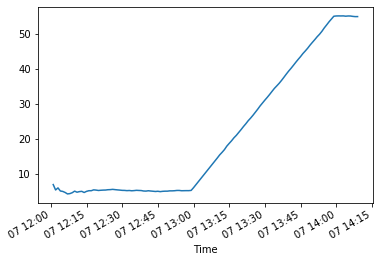

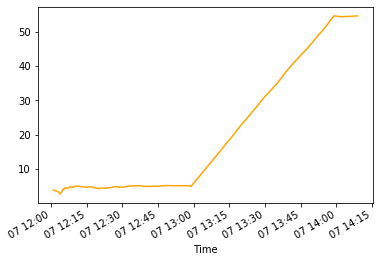

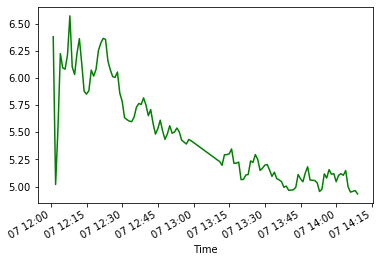

In [8]:
X_train.loc["dummy0"].Steps_mean.plot()
plt.show()
X_train.loc["dummy2"].Steps_mean.plot(color="orange")
plt.show()
X_train.loc["dummy4"].Steps_mean.plot(color="green")
plt.show()

Id
dummy0    AxesSubplot(0.125,0.125;0.775x0.755)
dummy2    AxesSubplot(0.125,0.125;0.775x0.755)
dummy4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Steps_mean, dtype: object

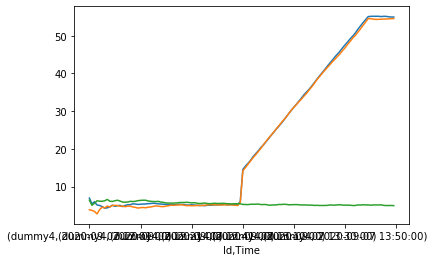

In [9]:
X_train.groupby("Id").Steps_mean.plot()

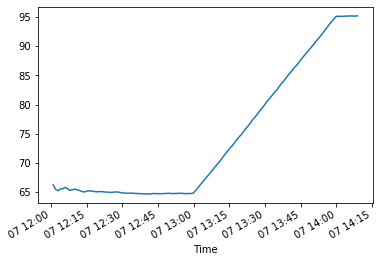

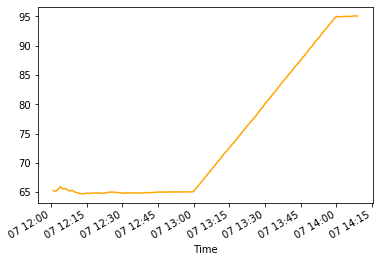

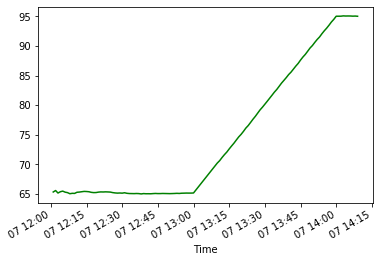

In [10]:
X_train.loc["dummy0"].HR_mean.plot()
plt.show()
X_train.loc["dummy2"].HR_mean.plot(color="orange")
plt.show()
X_train.loc["dummy4"].HR_mean.plot(color="green")
plt.show()

Id
dummy0    AxesSubplot(0.125,0.125;0.775x0.755)
dummy2    AxesSubplot(0.125,0.125;0.775x0.755)
dummy4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: HR_mean, dtype: object

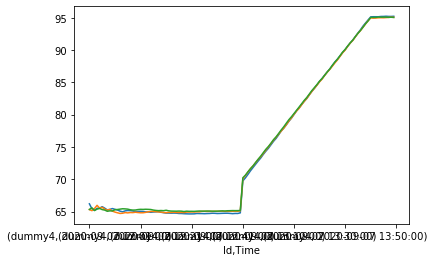

In [11]:
X_train.groupby("Id").HR_mean.plot()

### Similarly, let's visualize the test features:

Id
dummy1    AxesSubplot(0.125,0.125;0.775x0.755)
dummy3    AxesSubplot(0.125,0.125;0.775x0.755)
dummy5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Steps_mean, dtype: object

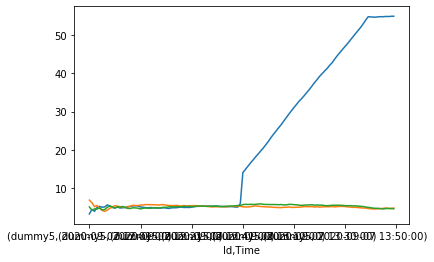

In [12]:
X_test.groupby("Id").Steps_mean.plot()

Id
dummy1    AxesSubplot(0.125,0.125;0.775x0.755)
dummy3    AxesSubplot(0.125,0.125;0.775x0.755)
dummy5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: HR_mean, dtype: object

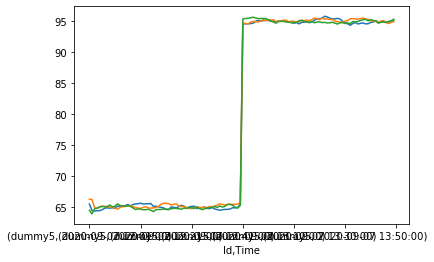

In [11]:
X_test.groupby("Id").HR_mean.plot()